In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask
import dask.dataframe as dd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training2/train2.csv
/kaggle/input/ddos-attack-categorization/sample_solution.csv
/kaggle/input/ddos-attack-categorization/network_incursion_prediction/test_togive.csv
/kaggle/input/ddos-attack-categorization/network_incursion_prediction/true_train_df.csv
/kaggle/input/training/train1.csv


Reading Provided Dataset

In [2]:
import dask
import dask.dataframe as dd
df = dd.read_csv('F:\\MLProj\\network_incursion_prediction\\true_train_df.csv')  
df.head()

,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,53.0,17.0,2291.0,1.0,1.0,49.0,164.0,49.0,49.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,80.0,6.0,5785762.0,3.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,80.0,6.0,13513.0,3.0,4.0,287.0,935.0,287.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,80.0,6.0,1610.0,3.0,4.0,308.0,935.0,308.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,53.0,17.0,1115.0,1.0,1.0,36.0,73.0,36.0,36.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.describe().compute()

c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract

  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]

c:\Users\dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract

  diff_b_a = subtract(b, a)

c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract

  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]

c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract

  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]

c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract

  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]

c:\Users\dell

,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,...,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07,1.517322e+07
mean,7.586610e+06,9.010744e+03,8.764111e+00,1.189523e+07,2.354139e+01,6.320131e+00,9.762205e+02,4.723074e+03,2.015284e+02,1.111593e+01,...,1.798595e+01,1.732707e+05,8.656449e+04,2.630110e+05,1.157877e+05,5.031904e+06,2.841348e+05,5.432396e+06,4.704579e+06,1.698728e-01
std,4.380132e+06,1.878197e+04,4.926176e+00,4.531726e+08,1.518820e+03,1.639010e+02,6.294672e+04,2.340814e+05,3.040442e+02,2.426781e+01,...,7.707226e+00,2.507734e+06,1.514220e+06,3.320979e+06,2.116440e+06,2.623781e+08,1.678245e+08,6.171166e+08,6.563188e+07,3.755210e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-8.282200e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.764645e+06,5.300000e+01,6.000000e+00,5.270000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.560385e+06,8.000000e+01,6.000000e+00,2.456900e+04,2.000000e+00,1.000000e+00,4.400000e+01,1.020000e+02,4.100000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.135290e+07,3.389000e+03,1.700000e+01,3.196090e+06,5.000000e+00,4.000000e+00,5.120000e+02,6.280000e+02,3.230000e+02,3.000000e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.517322e+07,6.553500e+04,1.700000e+01,1.200000e+08,3.096290e+05,1.231180e+05,1.443918e+08,1.563604e+08,6.444000e+04,1.460000e+03,...,5.600000e+01,1.140000e+08,7.523241e+07,1.140000e+08,1.140000e+08,3.955714e+11,2.622479e+11,9.797810e+11,2.399340e+11,1.000000e+00


In [ ]:
df.isna().sum().compute()

index            0
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [ ]:
(df == '?').sum().compute()

In [17]:
len(df)

15173222

In [ ]:
df.columns

Index(['index', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fw

In [12]:
  for col in df.columns:
        num = df[col].nunique().compute()
        line = f'{col}\t{num}'
        print(line)

index	15173222

Dst Port	64661

Protocol	3

Flow Duration	4816199

Tot Fwd Pkts	5158

Tot Bwd Pkts	4210

TotLen Fwd Pkts	19368

TotLen Bwd Pkts	88014

Fwd Pkt Len Max	1505

Fwd Pkt Len Min	492

Fwd Pkt Len Mean	159636

Fwd Pkt Len Std	359310

Bwd Pkt Len Max	1480

Bwd Pkt Len Min	471

Bwd Pkt Len Mean	276399

Bwd Pkt Len Std	406188

Flow Byts/s	6651623

Flow Pkts/s	6236501

Flow IAT Mean	5690827

Flow IAT Std	6950810

Flow IAT Max	2893196

Flow IAT Min	729083

Fwd IAT Tot	4077631

Fwd IAT Mean	4854167

Fwd IAT Std	5150147

Fwd IAT Max	2707124

Fwd IAT Min	891660

Bwd IAT Tot	3358458

Bwd IAT Mean	4061089

Bwd IAT Std	4815727

Bwd IAT Max	1912782

Bwd IAT Min	462797

Fwd PSH Flags	2

Bwd PSH Flags	1

Fwd URG Flags	2

Bwd URG Flags	1

Fwd Header Len	7879

Bwd Header Len	7112

Fwd Pkts/s	6161881

Bwd Pkts/s	5079537

Pkt Len Min	161

Pkt Len Max	1534

Pkt Len Mean	442086

Pkt Len Std	639310

Pkt Len Var	639980

FIN Flag Cnt	2

SYN Flag Cnt	2

RST Flag Cnt	2

PSH Flag Cnt	2

ACK Flag Cnt	2


Dropping the col with single unique values:

In [3]:
df = df.drop(['index','Bwd URG Flags' , 'Fwd Byts/b Avg' , 'Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Bwd PSH Flags'], axis = 1)

In [4]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53.0,17.0,2291.0,1.0,1.0,49.0,164.0,49.0,49.0,49.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,80.0,6.0,5785762.0,3.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,80.0,6.0,13513.0,3.0,4.0,287.0,935.0,287.0,0.0,95.666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,80.0,6.0,1610.0,3.0,4.0,308.0,935.0,308.0,0.0,102.666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,53.0,17.0,1115.0,1.0,1.0,36.0,73.0,36.0,36.0,36.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Check for max value- observed inf values below:

In [16]:
for col in df.columns:
        num = df[col].describe().compute()
        line = f'{col}\t{num}'
        print(line)

Dst Port	count    1.517322e+07

mean     9.010744e+03

std      1.878197e+04

min      0.000000e+00

25%      5.300000e+01

50%      8.000000e+01

75%      3.389000e+03

max      6.553500e+04

Name: Dst Port, dtype: float64

Protocol	count    1.517322e+07

mean     8.764111e+00

std      4.926176e+00

min      0.000000e+00

25%      6.000000e+00

50%      6.000000e+00

75%      1.700000e+01

max      1.700000e+01

Name: Protocol, dtype: float64

Flow Duration	count    1.517322e+07

mean     1.189523e+07

std      4.531726e+08

min     -8.282200e+11

25%      5.270000e+02

50%      2.456900e+04

75%      3.196090e+06

max      1.200000e+08

Name: Flow Duration, dtype: float64

Tot Fwd Pkts	count    1.517322e+07

mean     2.354139e+01

std      1.518820e+03

min      1.000000e+00

25%      1.000000e+00

50%      2.000000e+00

75%      5.000000e+00

max      3.096290e+05

Name: Tot Fwd Pkts, dtype: float64

Tot Bwd Pkts	count    1.517322e+07

mean     6.320131e+00

std      1.639010e+02



In [7]:
df = df.replace([np.inf], np.nan)

In [8]:
df = df.dropna()


After removing the nan rows:

In [9]:
len(df)

15139506

In [21]:
for col in df.columns:
       print(df[col].dtype)

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

int64


Change the data types to reduce the memory usage done below:

In [10]:
def reduce_mem_usage(df):
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min().compute()
            c_max = df[col].max().compute()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    
    
    return df



df = reduce_mem_usage(df)
    

In [40]:
for col in df.columns:
       print(df[col].dtype)

float32

float16

float32

float32

float32

float32

float32

float16

float16

float16

float16

float16

float16

float16

float16

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float32

float16

float16

float32

float32

float32

float32

float16

float16

float16

float16

float32

float16

float16

float16

float16

float16

float16

float16

float16

float16

float16

float16

float16

float32

float32

float32

float32

float32

float32

float32

float16

float64

float64

float64

float64

float64

float64

float64

float64

int64


finding the correlation

In [ ]:
df.to_csv('F:\\MLproj\\train1.csv', index=False, single_file=True)

In [ ]:
d = dd.read_csv('F:\\MLproj\\train1.csv')  

In [13]:
corr_matrix = d.corr().compute()

In [14]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

              DstPort  Protocol  FlowDuration  TotFwdPkts  TotBwdPkts  \

DstPort           NaN -0.263141     -0.005658   -0.006297   -0.013503   

Protocol          NaN       NaN     -0.016405    0.018093   -0.017109   

FlowDuration      NaN       NaN           NaN    0.002981    0.004164   

TotFwdPkts        NaN       NaN           NaN         NaN    0.034074   

TotBwdPkts        NaN       NaN           NaN         NaN         NaN   

...               ...       ...           ...         ...         ...   

IdleMean          NaN       NaN           NaN         NaN         NaN   

IdleStd           NaN       NaN           NaN         NaN         NaN   

IdleMax           NaN       NaN           NaN         NaN         NaN   

IdleMin           NaN       NaN           NaN         NaN         NaN   

Label             NaN       NaN           NaN         NaN         NaN   



              TotLenFwdPkts  TotLenBwdPkts  FwdPktLenMax  FwdPktLenMin  \

DstPort           -0.003674      -0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

  """Entry point for launching an IPython kernel.


In [16]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)
len(to_drop)



['TotLenBwdPkts', 'FwdPktLenStd', 'BwdPktLenStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'FwdHeaderLen', 'BwdHeaderLen', 'FwdPkts/s', 'PktLenMin', 'PktLenMax', 'PktLenMean', 'PktLenStd', 'SYNFlagCnt', 'CWEFlagCount', 'ECEFlagCnt', 'PktSizeAvg', 'FwdSegSizeAvg', 'BwdSegSizeAvg', 'SubflowFwdPkts', 'SubflowFwdByts', 'SubflowBwdPkts', 'SubflowBwdByts', 'FwdActDataPkts', 'ActiveMax', 'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax']


31

In [19]:
train2 = d.drop(d[to_drop], axis=1)
print(train2.head())

   DstPort  Protocol  FlowDuration  TotFwdPkts  TotBwdPkts  TotLenFwdPkts  \

0     53.0      17.0        2291.0         1.0         1.0           49.0   

1     80.0       6.0     5785762.0         3.0         1.0            0.0   

2     80.0       6.0       13513.0         3.0         4.0          287.0   

3     80.0       6.0        1610.0         3.0         4.0          308.0   

4     53.0      17.0        1115.0         1.0         1.0           36.0   



   FwdPktLenMax  FwdPktLenMin  FwdPktLenMean  BwdPktLenMax  ...  ACKFlagCnt  \

0          49.0          49.0           49.0         164.0  ...         0.0   

1           0.0           0.0            0.0           0.0  ...         0.0   

2         287.0           0.0           95.7         935.0  ...         0.0   

3         308.0           0.0          102.7         935.0  ...         0.0   

4          36.0          36.0           36.0          73.0  ...         0.0   



   URGFlagCnt  Down/UpRatio  InitFwdWinByts  Ini

In [21]:
train2.columns

Index(['DstPort', 'Protocol', 'FlowDuration', 'TotFwdPkts', 'TotBwdPkts',
       'TotLenFwdPkts', 'FwdPktLenMax', 'FwdPktLenMin', 'FwdPktLenMean',
       'BwdPktLenMax', 'BwdPktLenMin', 'BwdPktLenMean', 'FlowByts/s',
       'FlowPkts/s', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin',
       'BwdIATTot', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin',
       'FwdPSHFlags', 'FwdURGFlags', 'BwdPkts/s', 'PktLenVar', 'FINFlagCnt',
       'RSTFlagCnt', 'PSHFlagCnt', 'ACKFlagCnt', 'URGFlagCnt', 'Down/UpRatio',
       'InitFwdWinByts', 'InitBwdWinByts', 'FwdSegSizeMin', 'ActiveMean',
       'ActiveStd', 'IdleMin', 'Label'],
      dtype='object')

In [27]:
train2['RSTFlagCnt'].value_counts().compute()


0.0    12285649
1.0     2853857
Name: RSTFlagCnt, dtype: int64

In [28]:
train2['PSHFlagCnt'].value_counts().compute()

0.0    9168886
1.0    5970620
Name: PSHFlagCnt, dtype: int64

In [29]:
train2['ACKFlagCnt'].value_counts().compute()

0.0    10171286
1.0     4968220
Name: ACKFlagCnt, dtype: int64

In [33]:
train2['URGFlagCnt'].value_counts().compute()

0.0    14504192
1.0      635314
Name: URGFlagCnt, dtype: int64

In [34]:
train2['FINFlagCnt'].value_counts().compute()

0.0    15073526
1.0       65980
Name: FINFlagCnt, dtype: int64

In [35]:
train2['FwdPSHFlags'].value_counts().compute()

0.0    14504465
1.0      635041
Name: FwdPSHFlags, dtype: int64

In [36]:
train2['FwdURGFlags'].value_counts().compute()

0.0    15136998
1.0        2508
Name: FwdURGFlags, dtype: int64

In [38]:
train2['Protocol'] = train2['Protocol'].astype(np.int8)
train2['FwdURGFlags'] = train2['FwdURGFlags'].astype(np.int8)
train2['FwdPSHFlags'] = train2['FwdPSHFlags'].astype(np.int8)
train2['FINFlagCnt'] = train2['FINFlagCnt'].astype(np.int8)
train2['URGFlagCnt'] = train2['URGFlagCnt'].astype(np.int8)
train2['ACKFlagCnt'] = train2['ACKFlagCnt'].astype(np.int8)
train2['PSHFlagCnt'] = train2['PSHFlagCnt'].astype(np.int8)
train2['RSTFlagCnt'] = train2['RSTFlagCnt'].astype(np.int8)
train2['Label'] = train2['Label'].astype(np.int8)


In [39]:
for col in train2.columns:
       print(train2[col].dtype)

float64

int8

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

float64

int8

int8

float64

float64

int8

int8

int8

int8

int8

float64

float64

float64

float64

float64

float64

float64

int8


In [ ]:
train2.to_csv('F:\\MLproj\\train2.csv', index=False, single_file=True)

In [2]:
train2 = dd.read_csv("../input/training2/train2.csv")

In [3]:
train2.dtypes

DstPort           float64
Protocol            int64
FlowDuration      float64
TotFwdPkts        float64
TotBwdPkts        float64
TotLenFwdPkts     float64
FwdPktLenMax      float64
FwdPktLenMin      float64
FwdPktLenMean     float64
BwdPktLenMax      float64
BwdPktLenMin      float64
BwdPktLenMean     float64
FlowByts/s        float64
FlowPkts/s        float64
FlowIATMean       float64
FlowIATStd        float64
FlowIATMax        float64
FlowIATMin        float64
BwdIATTot         float64
BwdIATMean        float64
BwdIATStd         float64
BwdIATMax         float64
BwdIATMin         float64
FwdPSHFlags         int64
FwdURGFlags         int64
BwdPkts/s         float64
PktLenVar         float64
FINFlagCnt          int64
RSTFlagCnt          int64
PSHFlagCnt          int64
ACKFlagCnt          int64
URGFlagCnt          int64
Down/UpRatio      float64
InitFwdWinByts    float64
InitBwdWinByts    float64
FwdSegSizeMin     float64
ActiveMean        float64
ActiveStd         float64
IdleMin     

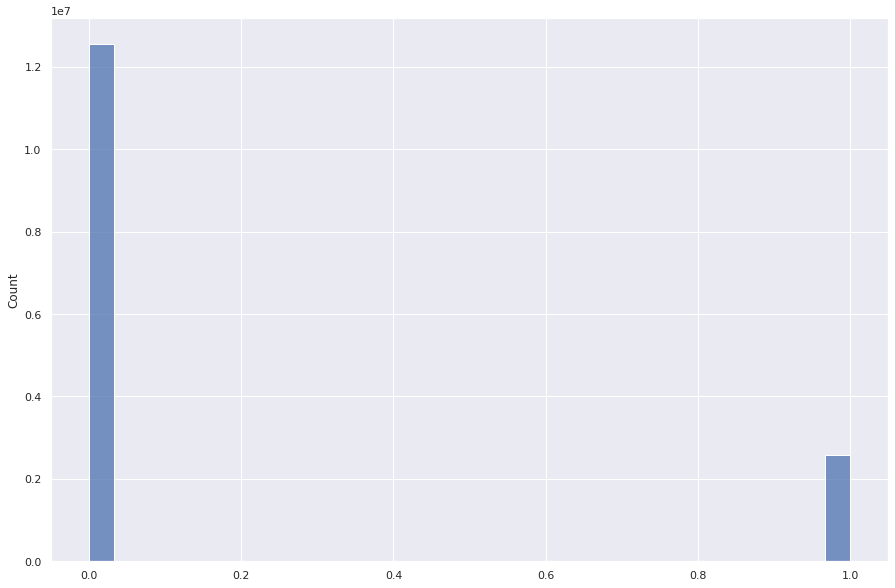

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(train2['Label'], bins=30)
plt.show()

In [38]:
train3 = pd.read_csv("../input/training2/train2.csv",chunksize=1000000)

In [39]:
x = train3.get_chunk()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


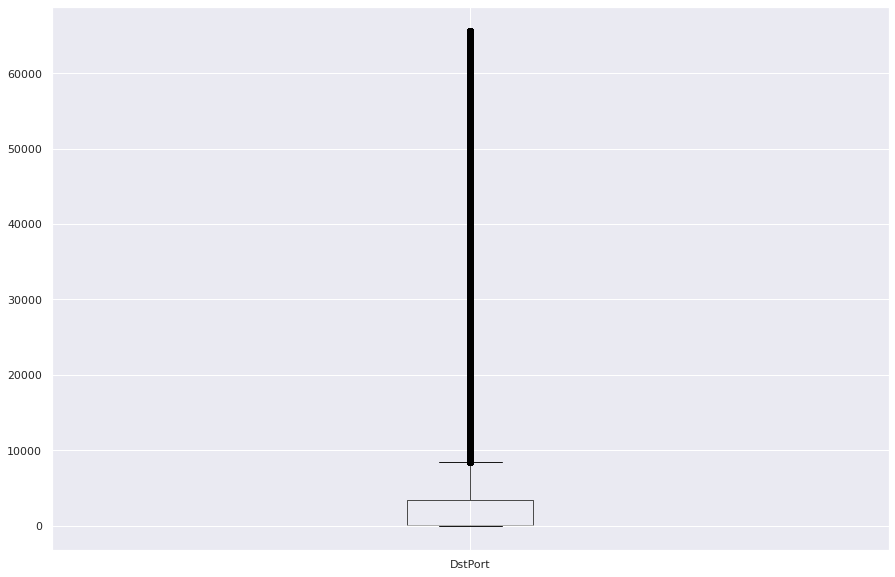

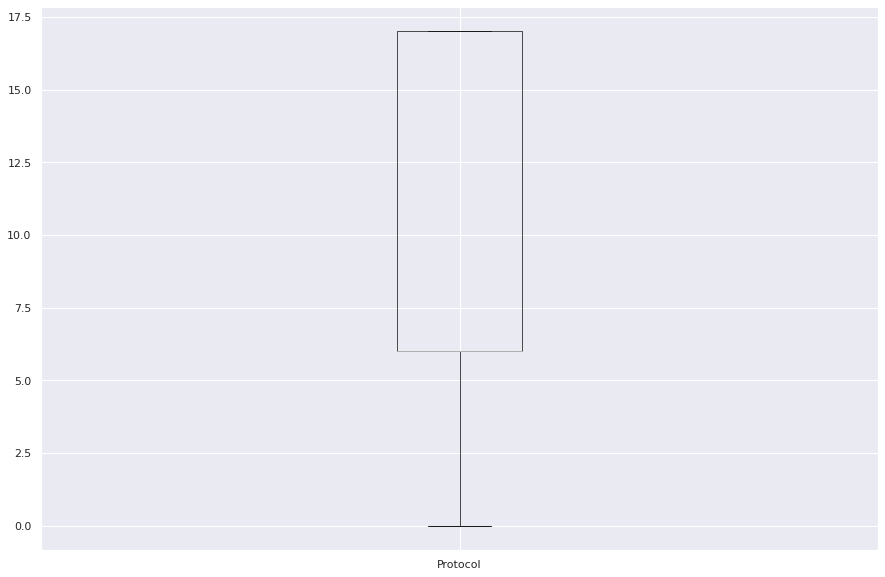

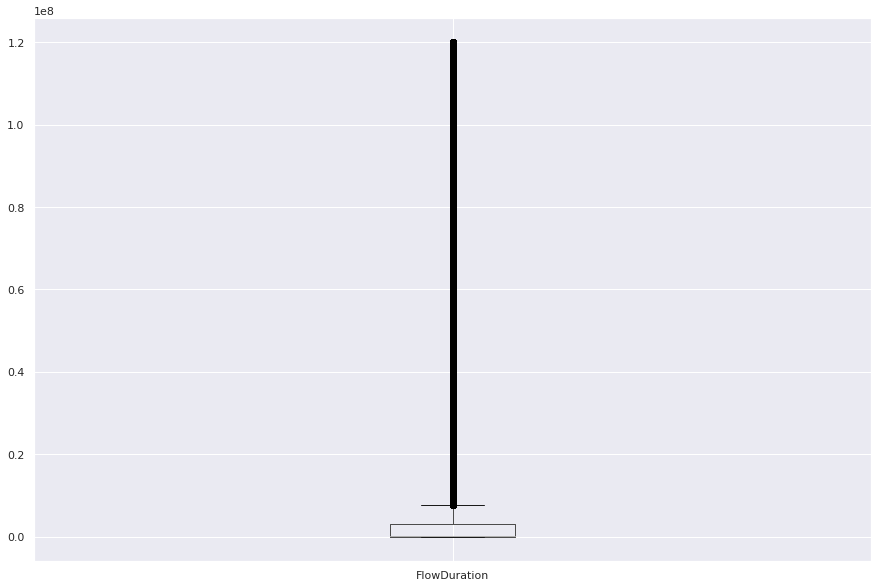

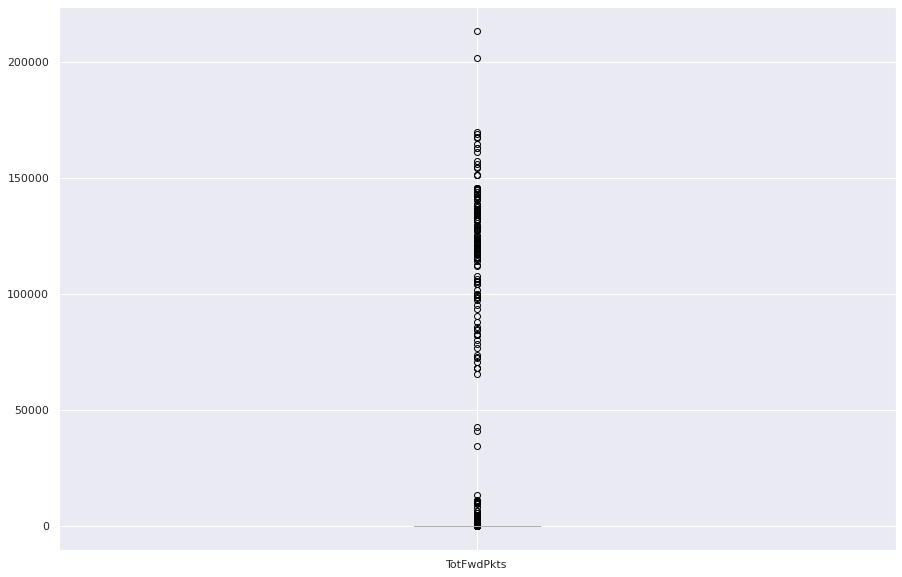

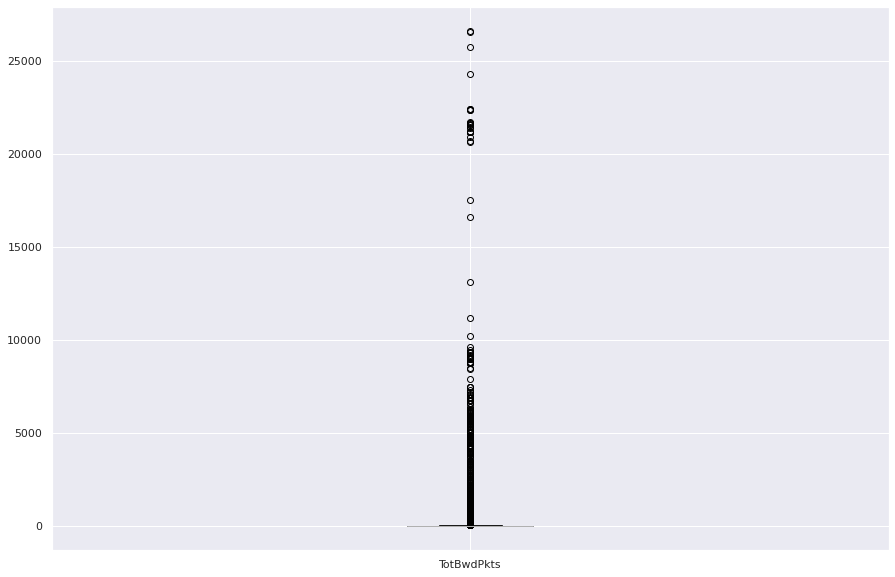

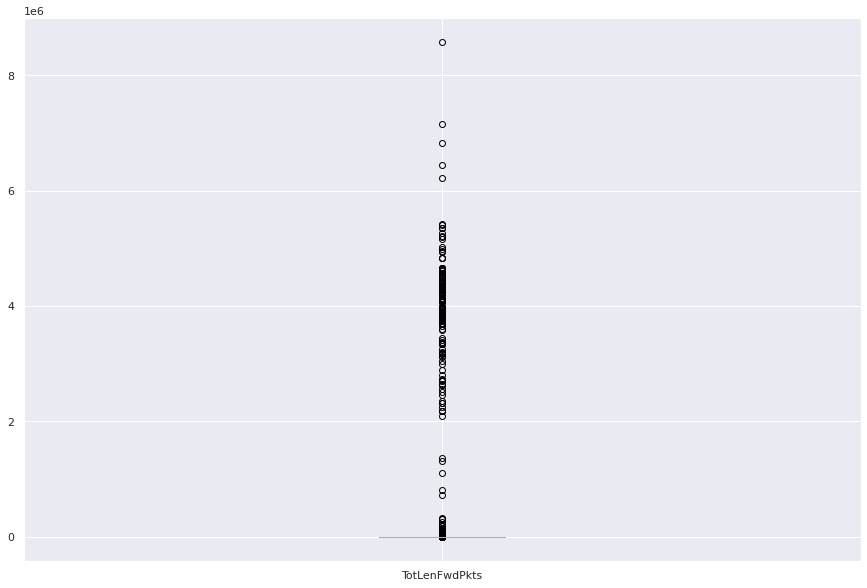

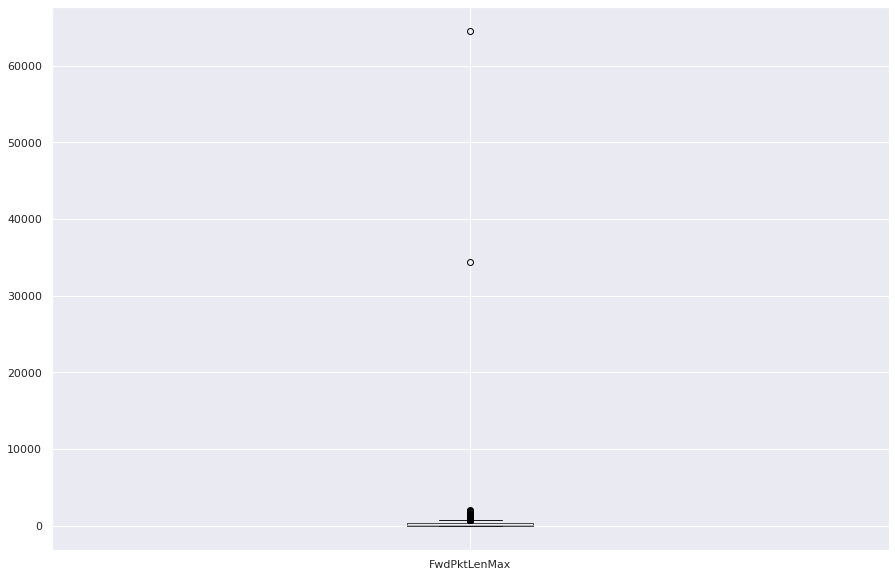

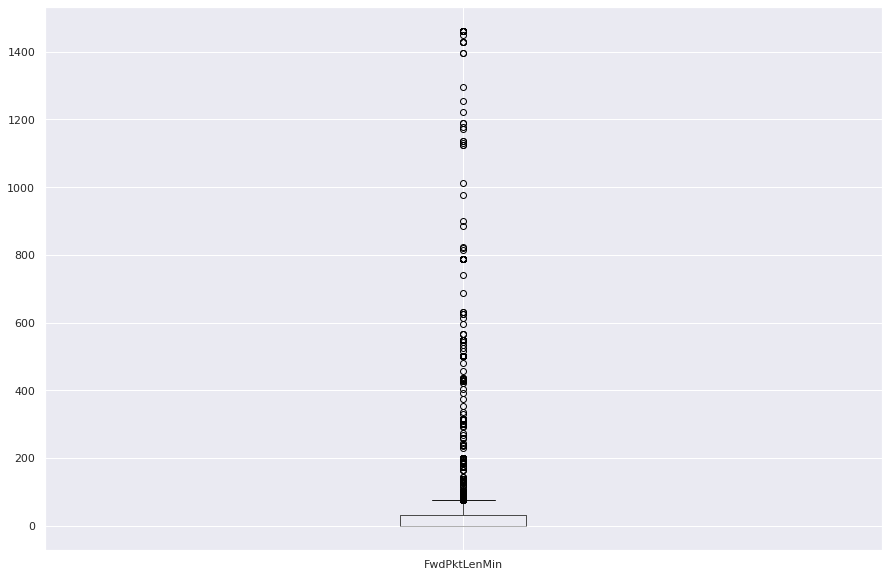

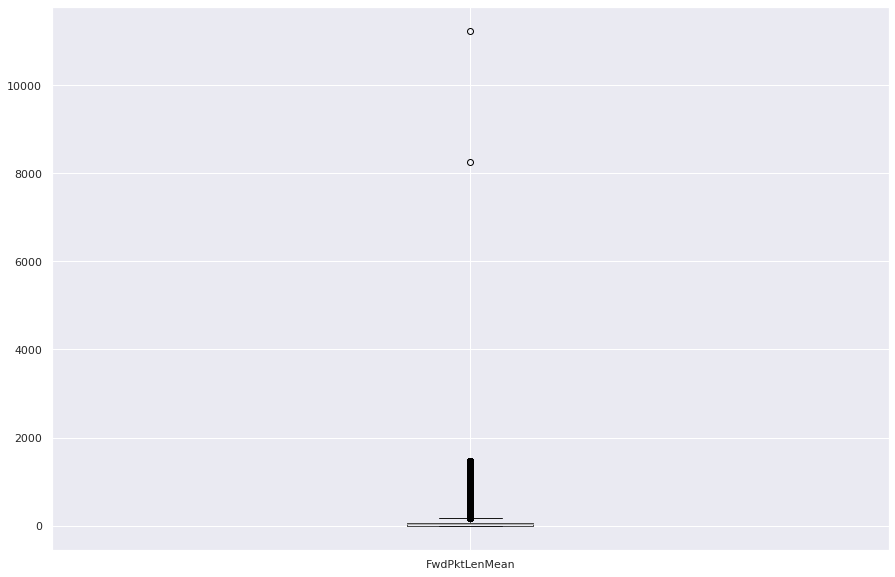

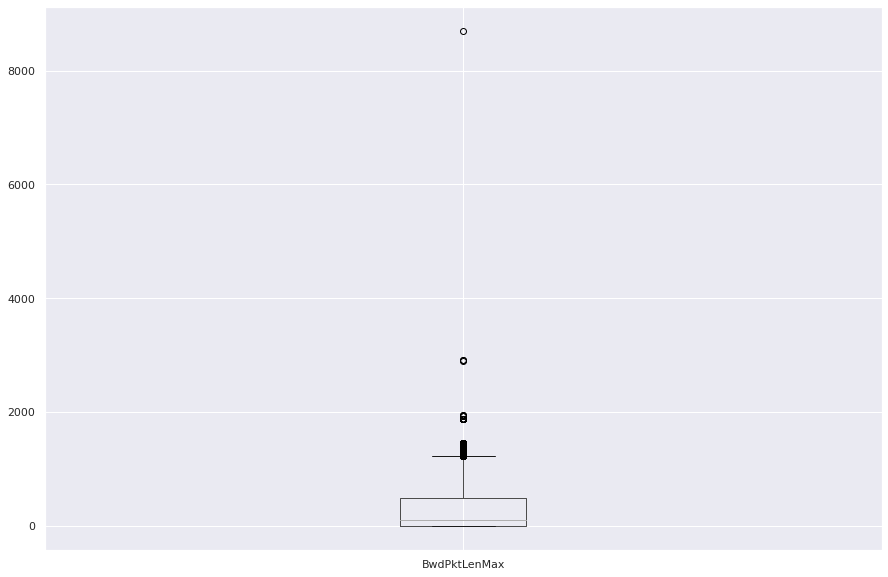

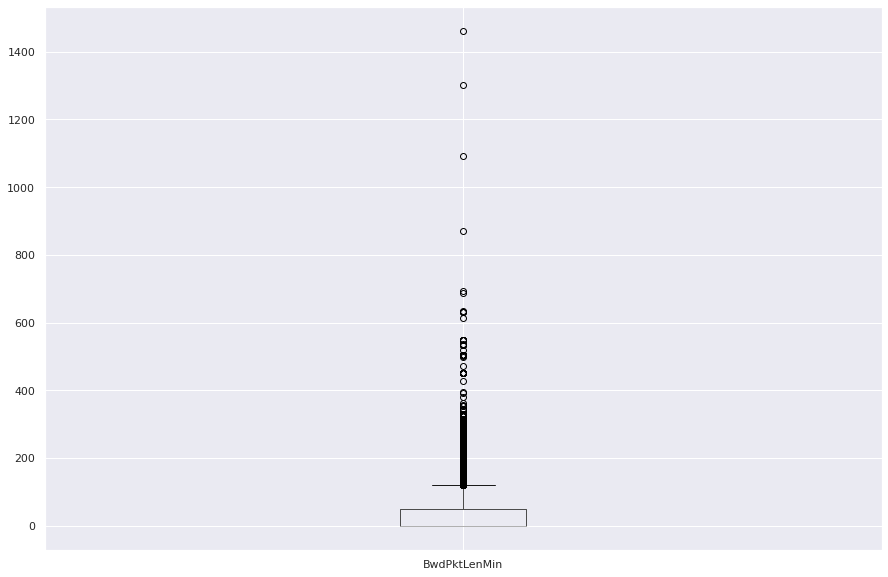

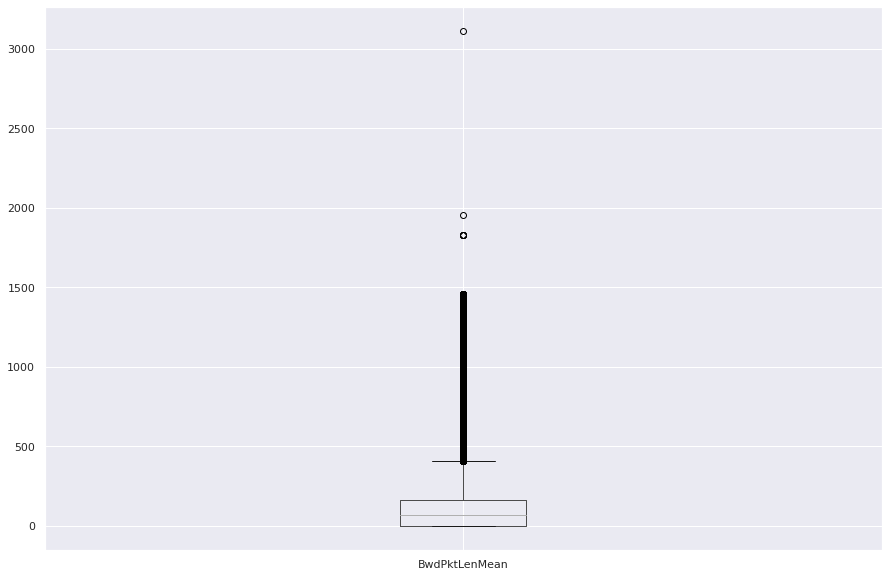

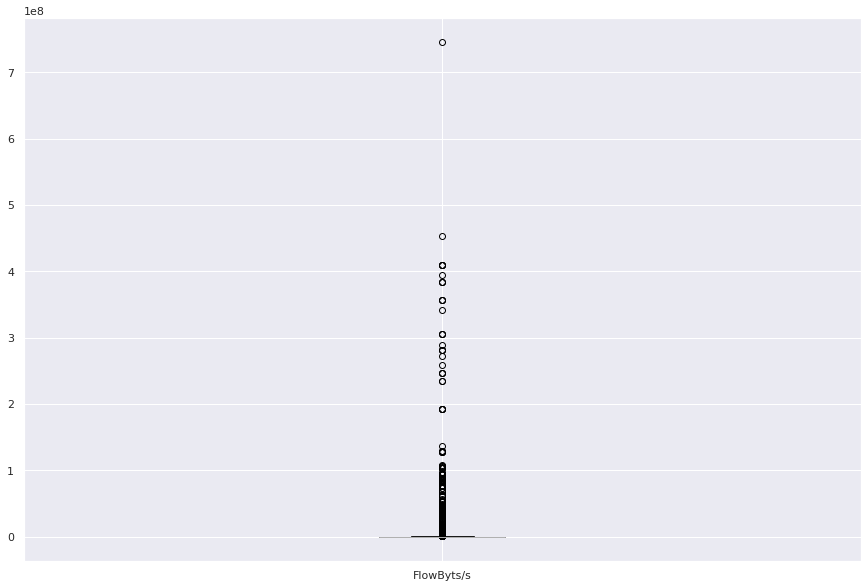

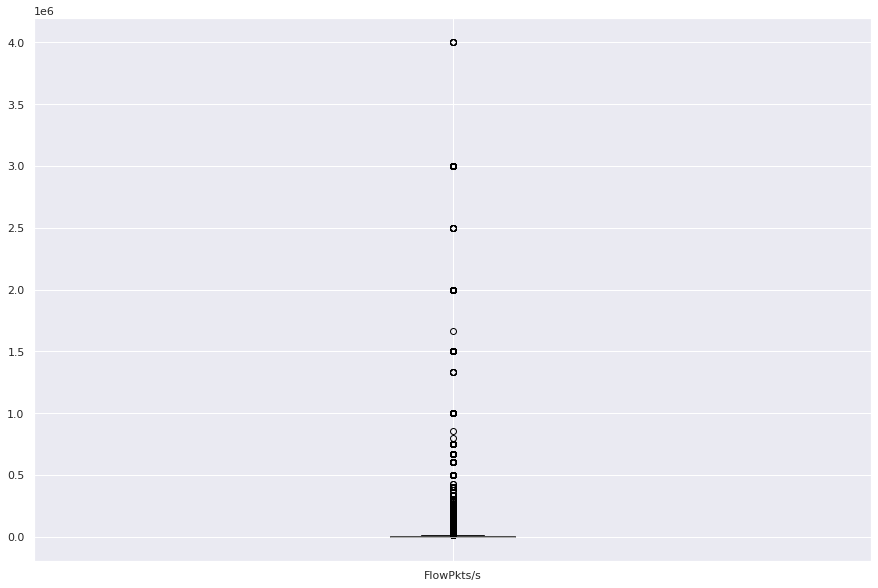

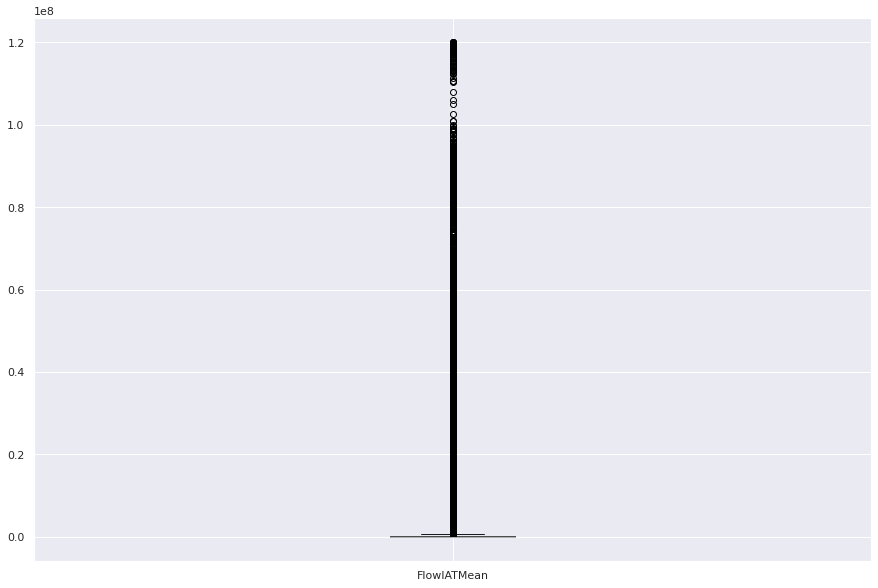

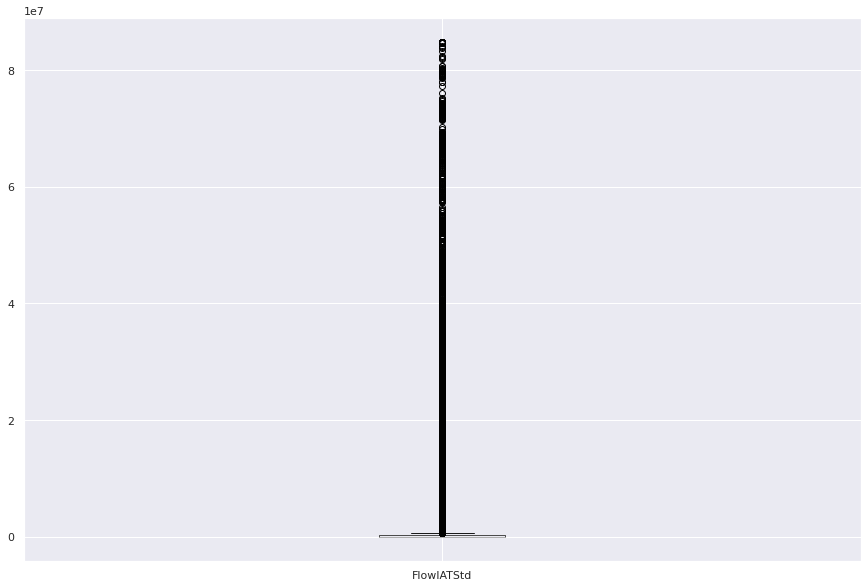

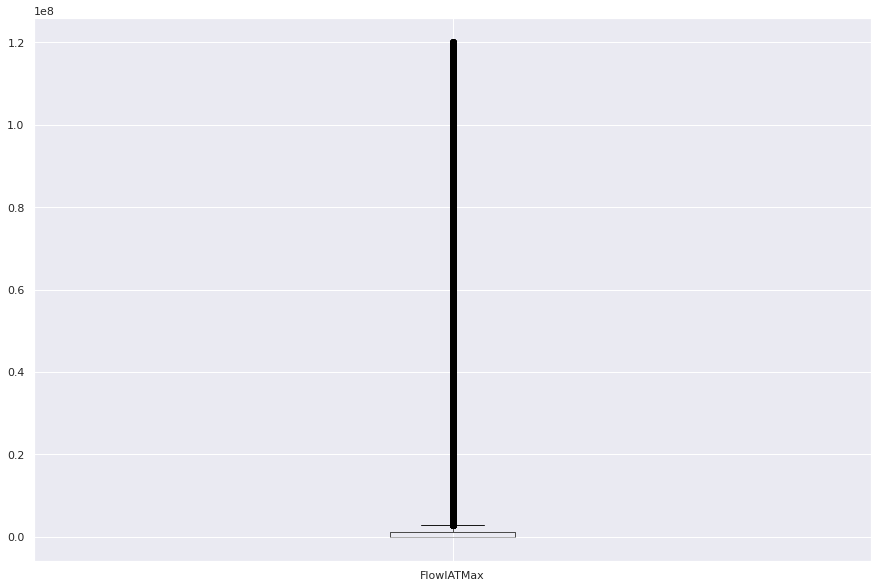

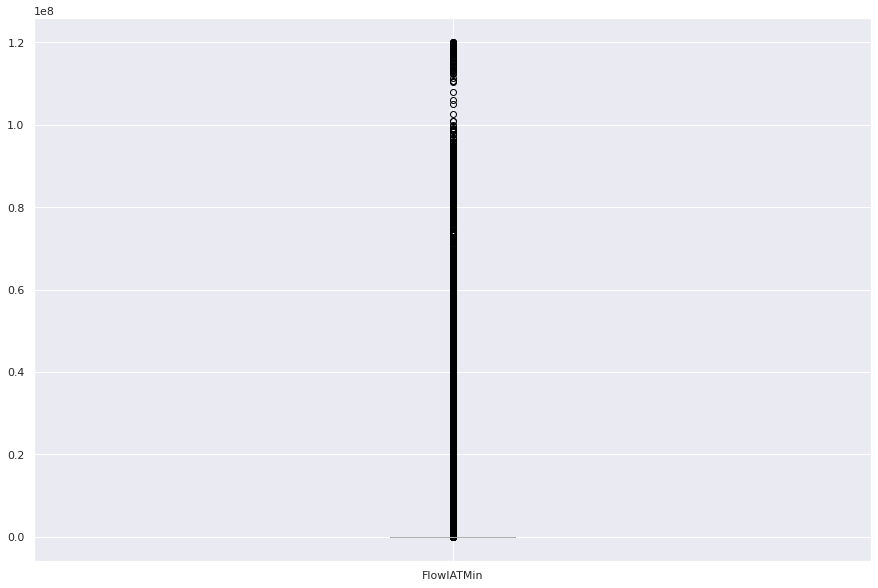

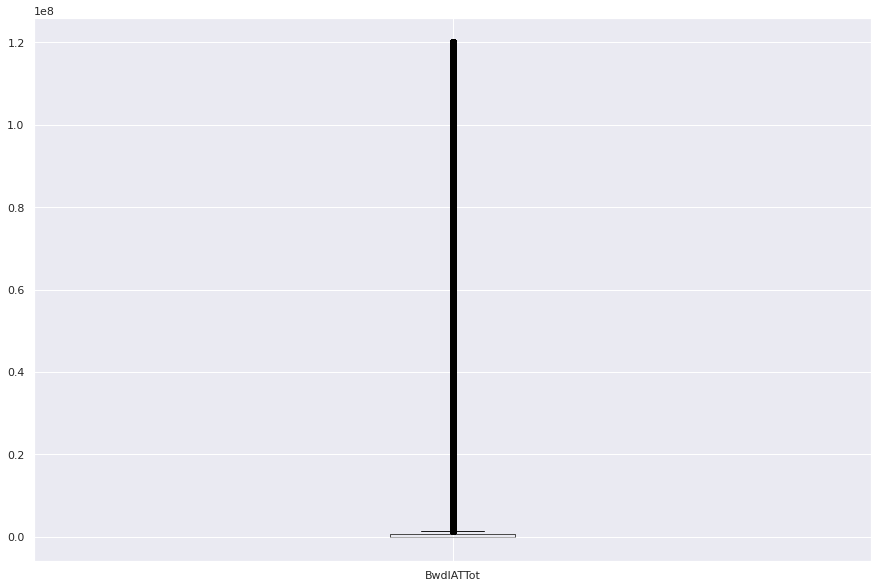

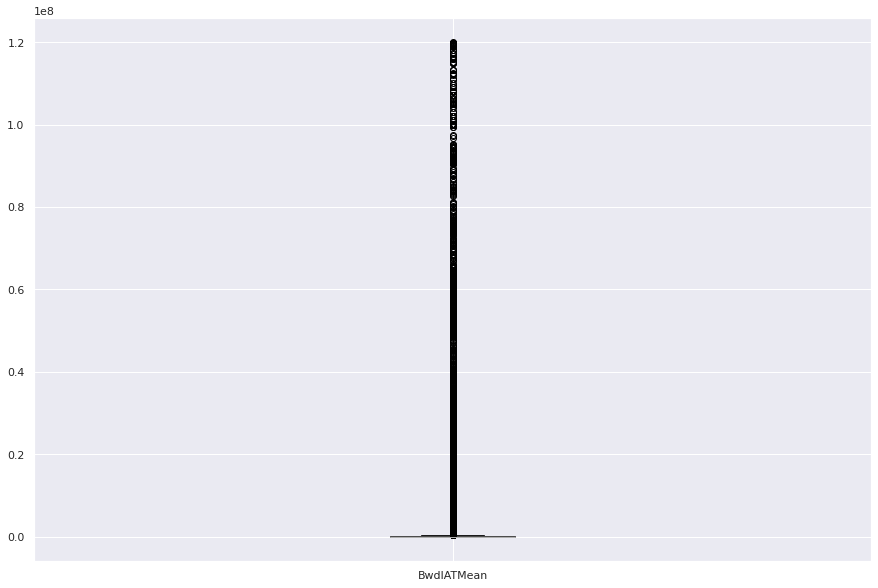

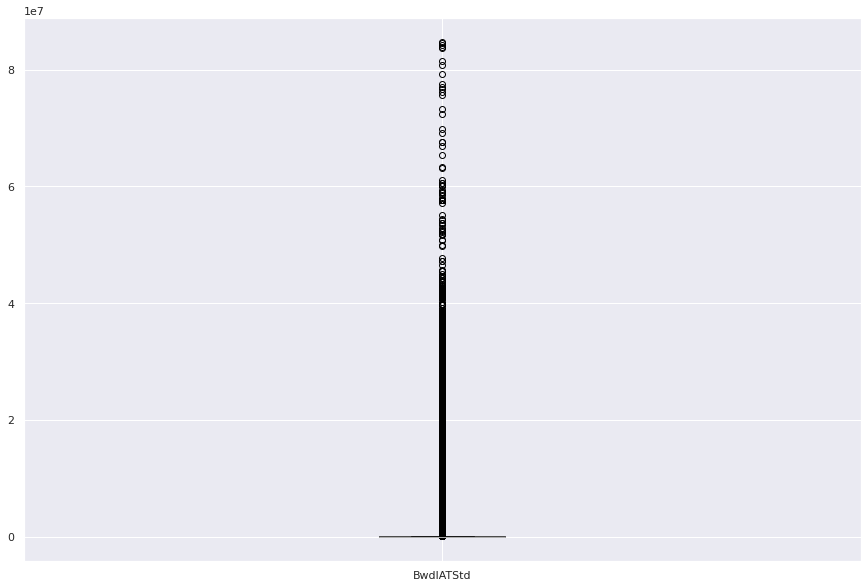

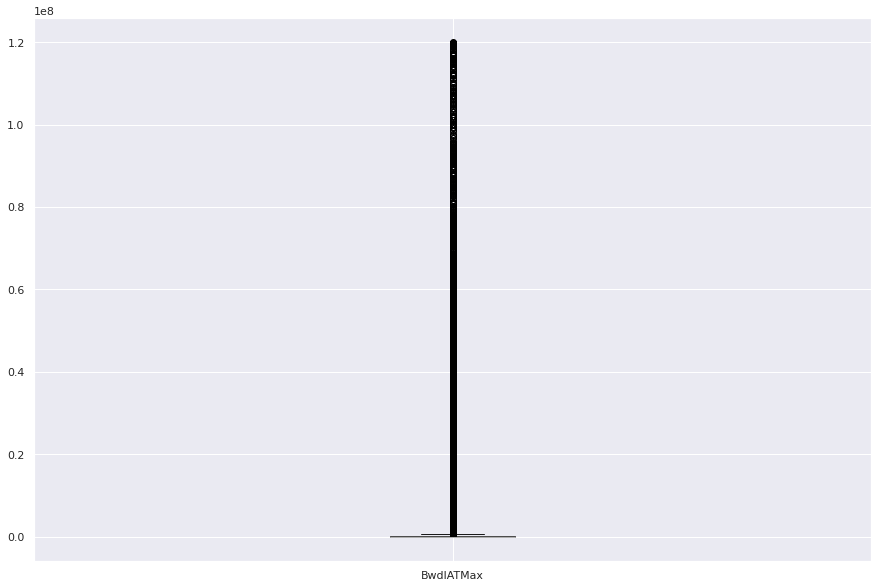

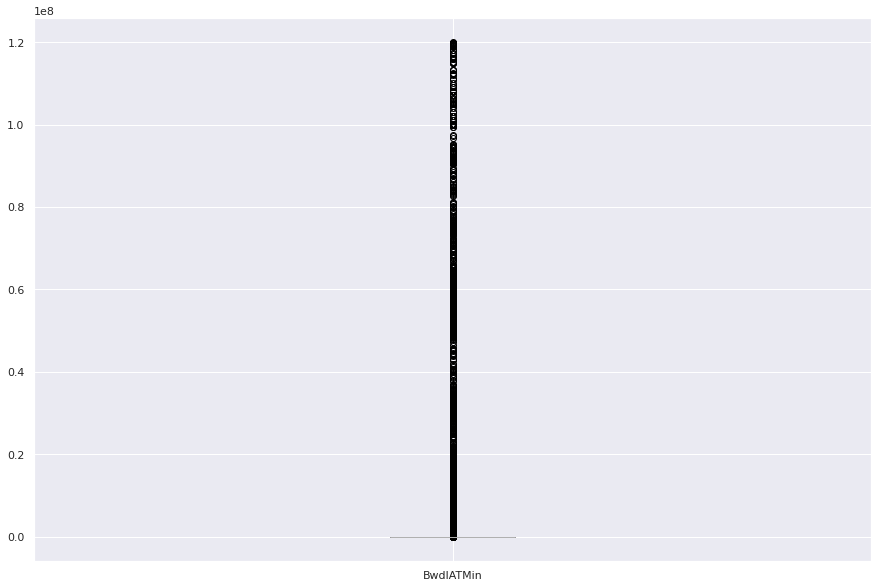

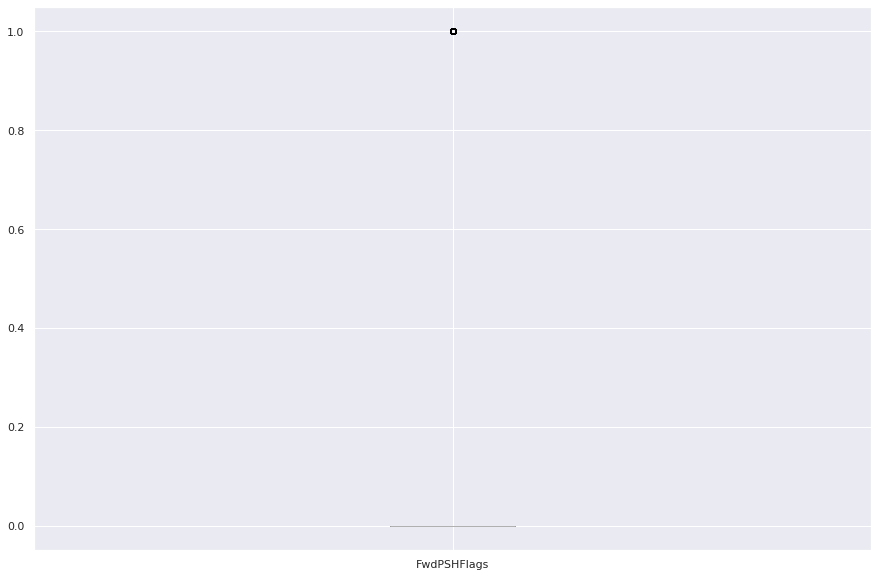

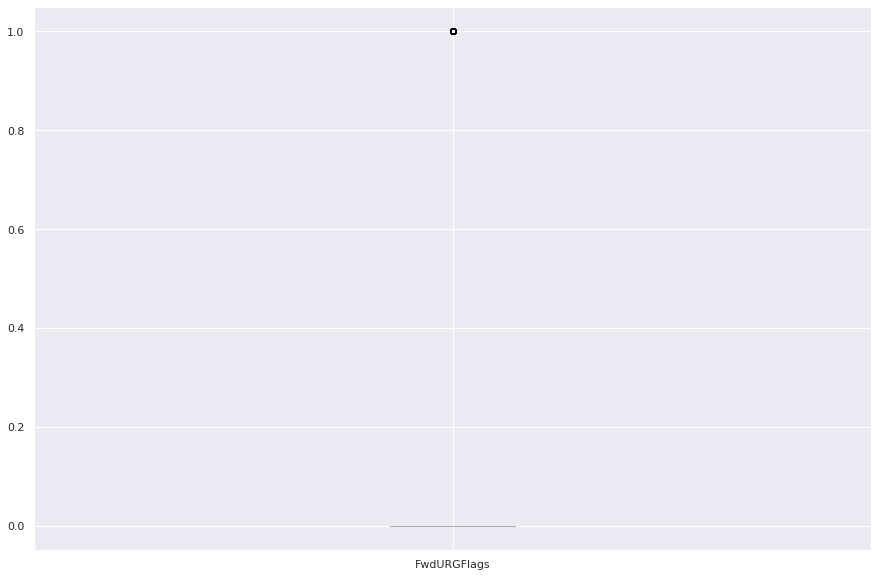

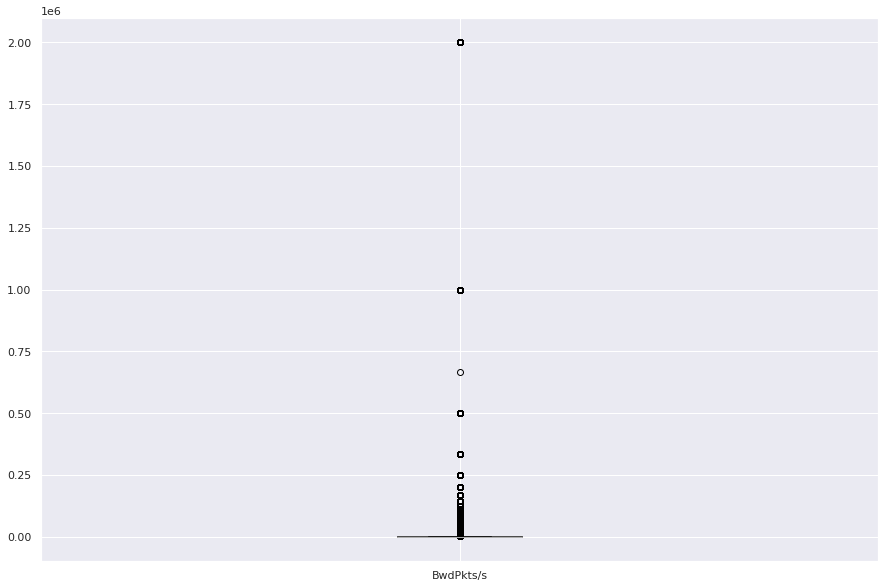

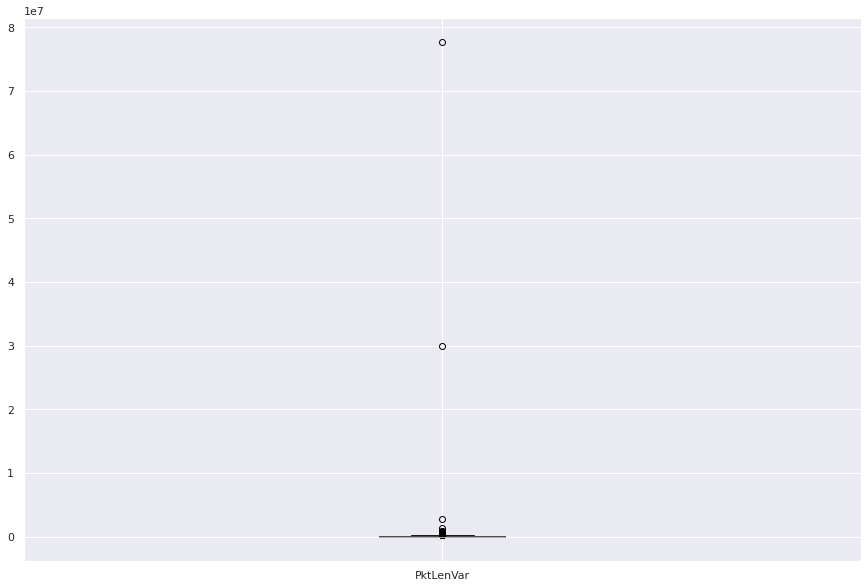

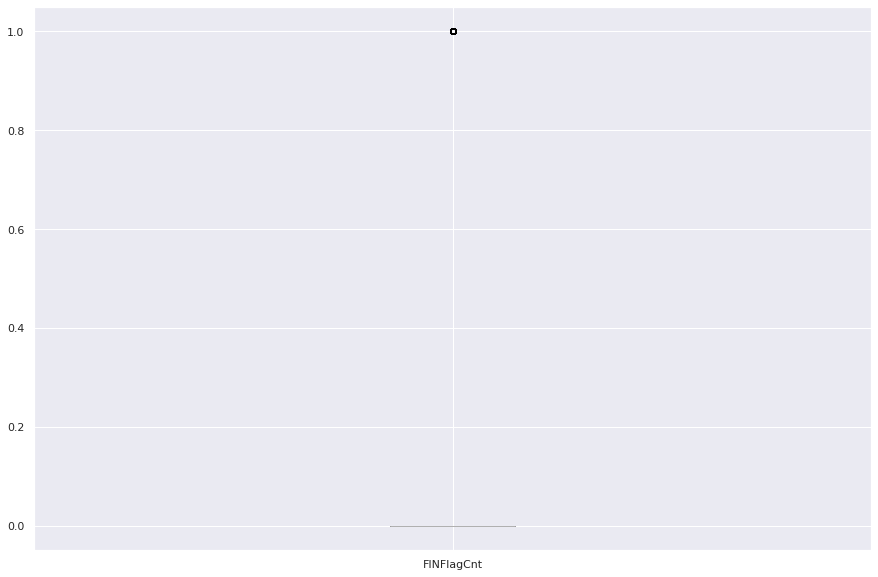

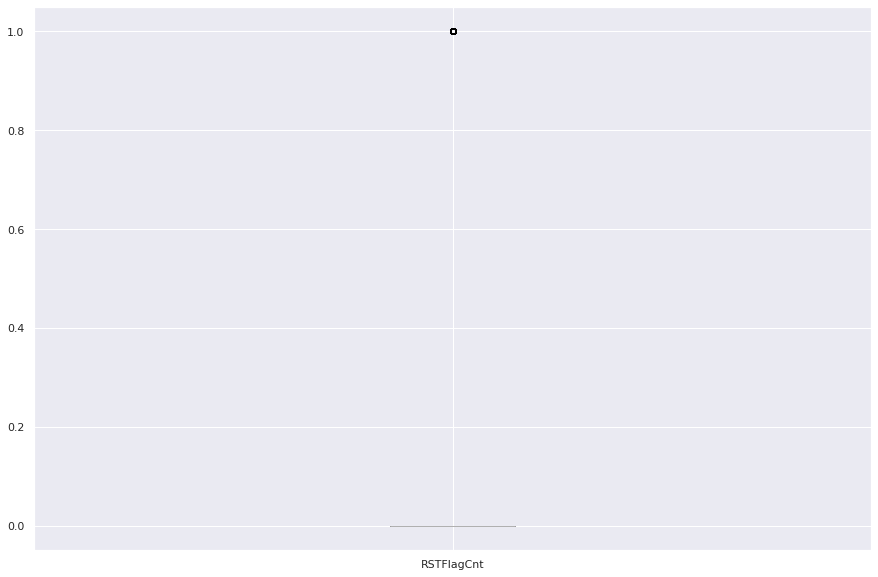

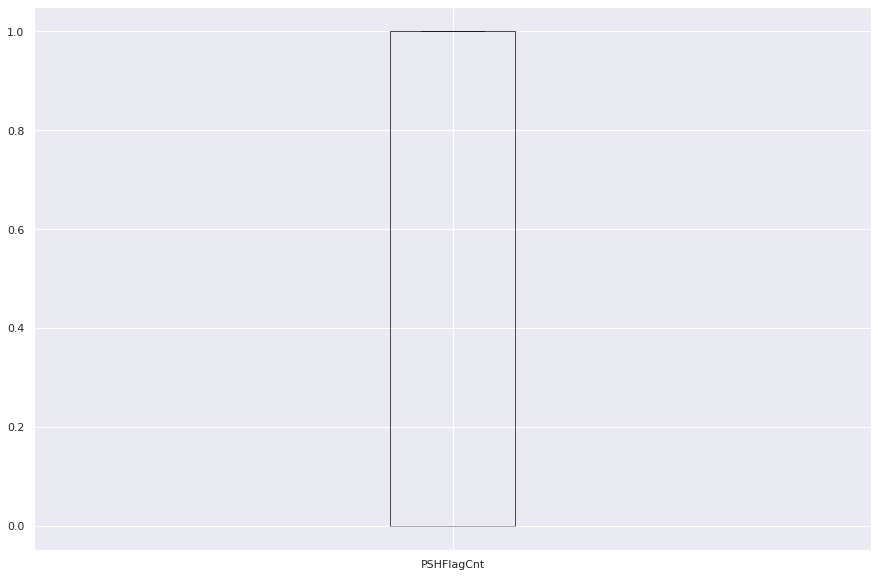

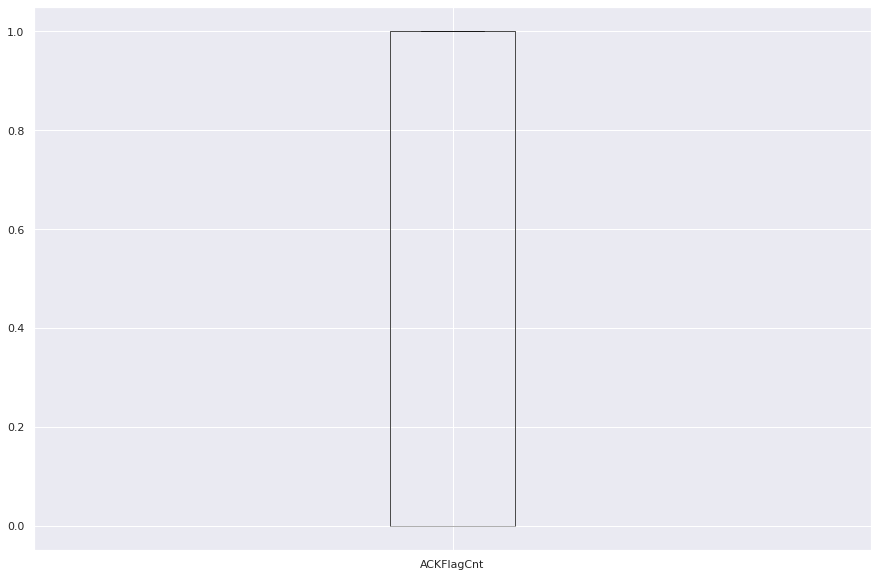

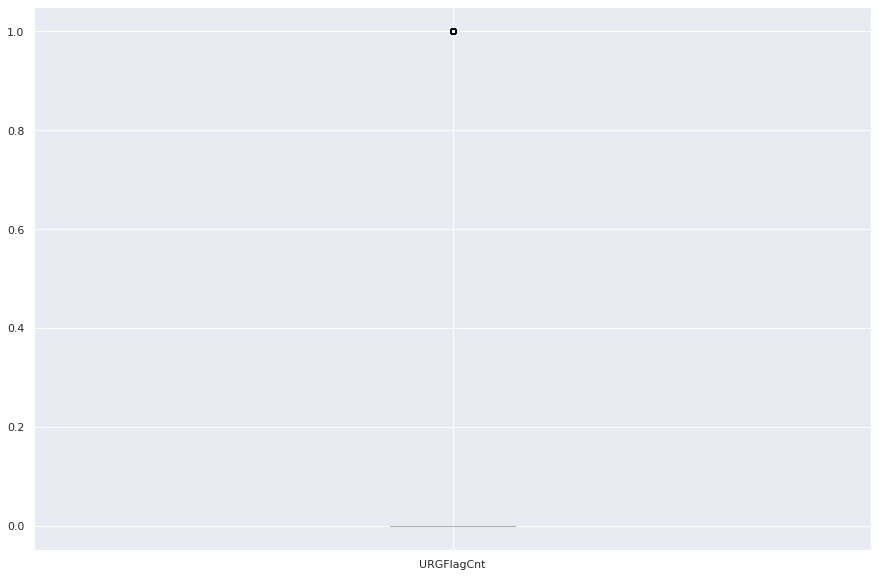

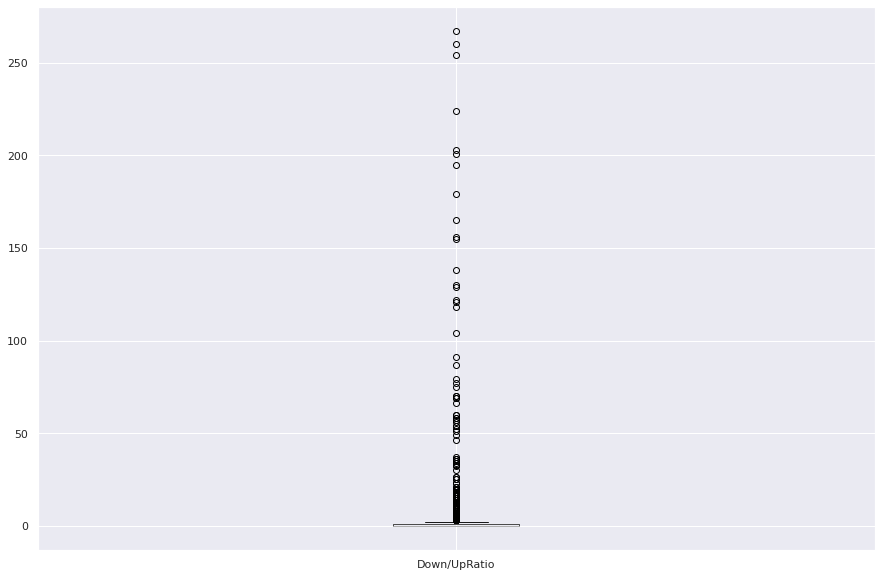

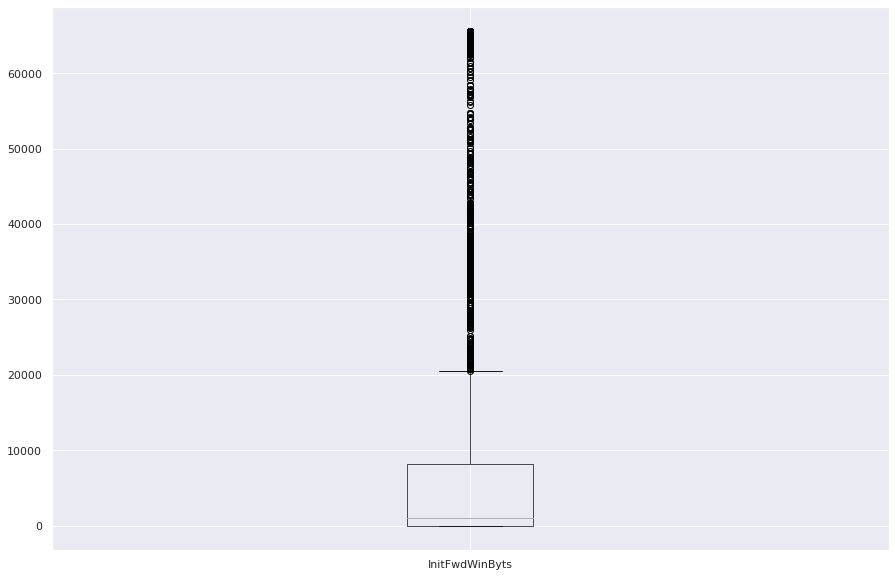

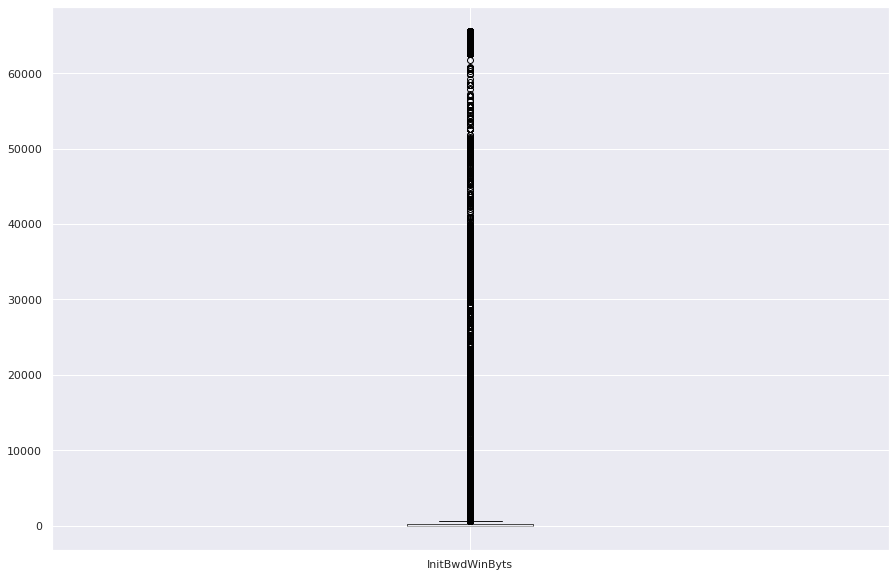

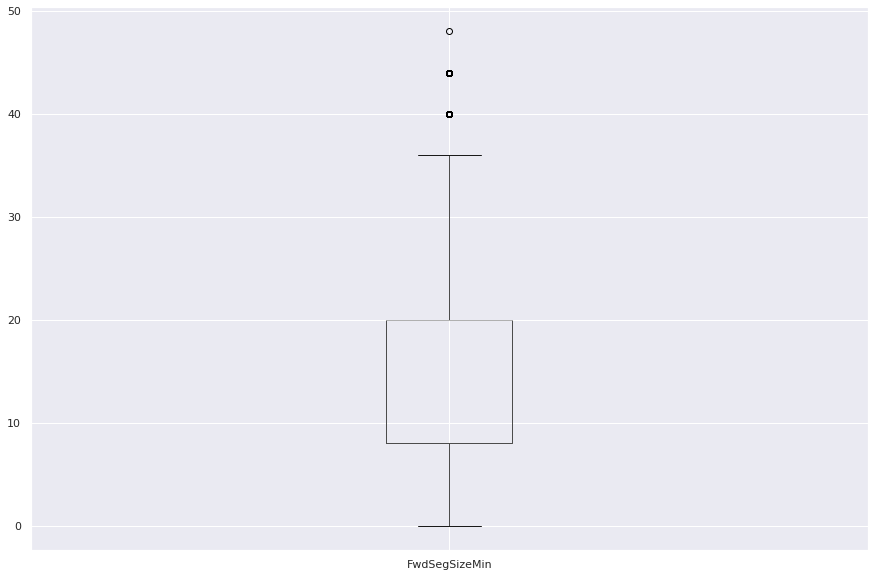

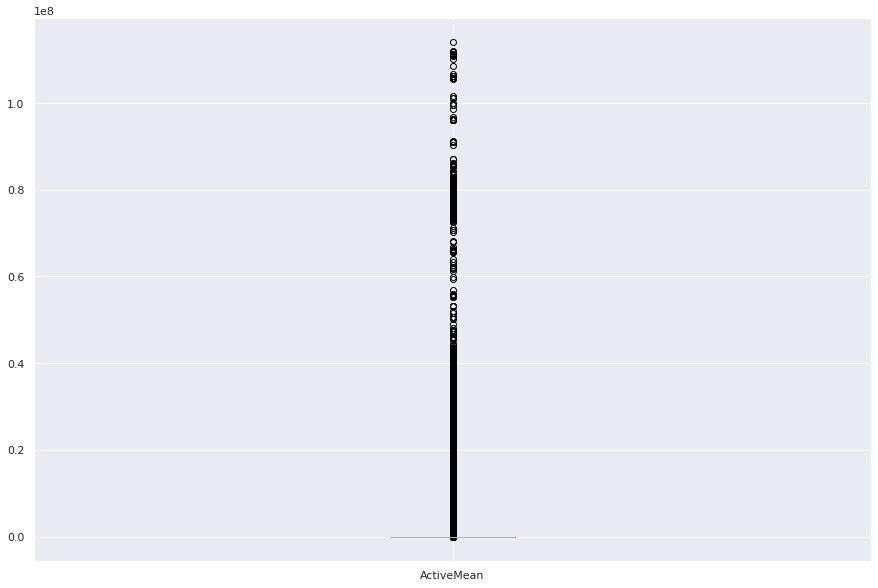

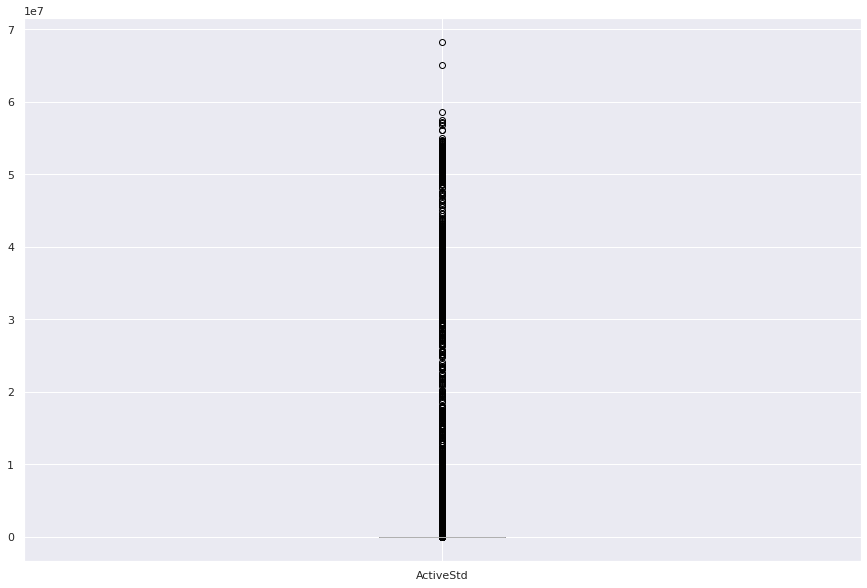

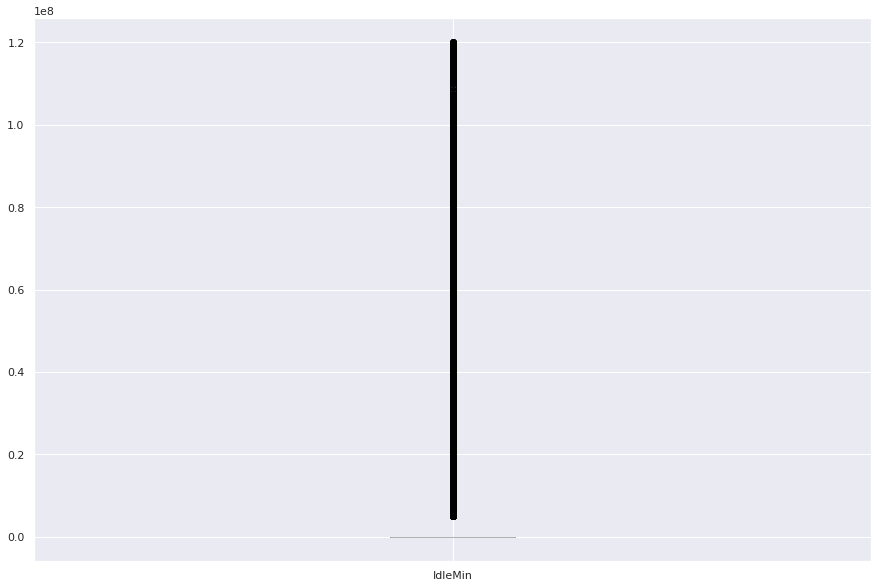

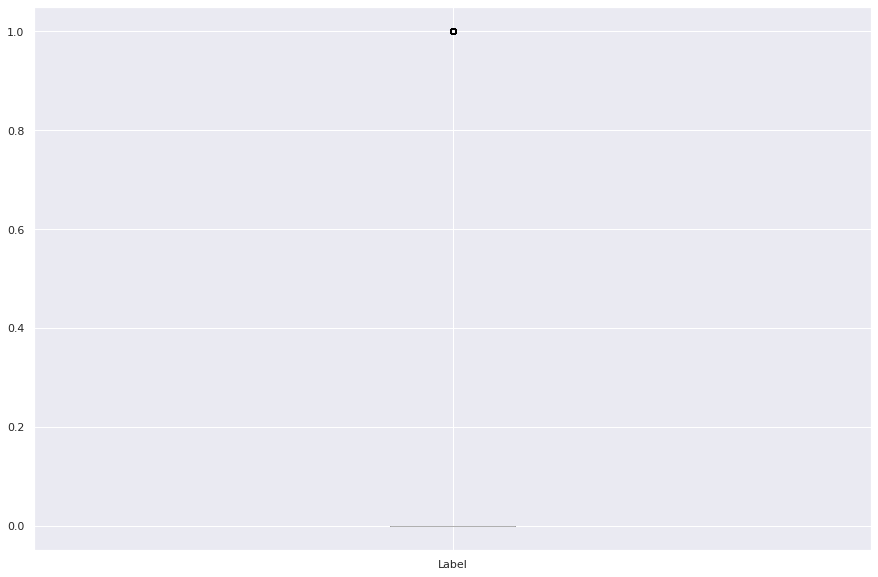

In [40]:
import matplotlib.pyplot as plt

for column in x:
    plt.figure()
    x.boxplot([column])

In [1]:
import numpy as np

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dask
import dask.dataframe as dd

In [18]:
train3 = dd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\train2.csv')

Changing the int8 to bool for train data:

In [19]:
train3['Protocol'] = train3['Protocol'].astype(np.int8)
train3['FwdURGFlags'] = train3['FwdURGFlags'].astype(bool)
train3['FwdPSHFlags'] = train3['FwdPSHFlags'].astype(bool)
train3['FINFlagCnt'] = train3['FINFlagCnt'].astype(bool)
train3['URGFlagCnt'] = train3['URGFlagCnt'].astype(bool)
train3['ACKFlagCnt'] = train3['ACKFlagCnt'].astype(bool)
train3['PSHFlagCnt'] = train3['PSHFlagCnt'].astype(bool)
train3['RSTFlagCnt'] = train3['RSTFlagCnt'].astype(bool)


In [20]:
train3.dtypes

DstPort           float64
Protocol             int8
FlowDuration      float64
TotFwdPkts        float64
TotBwdPkts        float64
TotLenFwdPkts     float64
FwdPktLenMax      float64
FwdPktLenMin      float64
FwdPktLenMean     float64
BwdPktLenMax      float64
BwdPktLenMin      float64
BwdPktLenMean     float64
FlowByts/s        float64
FlowPkts/s        float64
FlowIATMean       float64
FlowIATStd        float64
FlowIATMax        float64
FlowIATMin        float64
BwdIATTot         float64
BwdIATMean        float64
BwdIATStd         float64
BwdIATMax         float64
BwdIATMin         float64
FwdPSHFlags          bool
FwdURGFlags          bool
BwdPkts/s         float64
PktLenVar         float64
FINFlagCnt           bool
RSTFlagCnt           bool
PSHFlagCnt           bool
ACKFlagCnt           bool
URGFlagCnt           bool
Down/UpRatio      float64
InitFwdWinByts    float64
InitBwdWinByts    float64
FwdSegSizeMin     float64
ActiveMean        float64
ActiveStd         float64
IdleMin     

Train - Test Split

In [21]:

X_train=train3.drop(['Label'],axis=1)


In [22]:
X_train.head()

,DstPort,Protocol,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,BwdPktLenMax,...,PSHFlagCnt,ACKFlagCnt,URGFlagCnt,Down/UpRatio,InitFwdWinByts,InitBwdWinByts,FwdSegSizeMin,ActiveMean,ActiveStd,IdleMin
0,53.0,17,2291.0,1.0,1.0,49.0,49.0,49.0,49.0,164.0,...,False,False,False,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0
1,80.0,6,5785762.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,0.0,8192.0,8192.0,20.0,0.0,0.0,0.0
2,80.0,6,13513.0,3.0,4.0,287.0,287.0,0.0,95.7,935.0,...,True,False,False,1.0,65535.0,219.0,20.0,0.0,0.0,0.0
3,80.0,6,1610.0,3.0,4.0,308.0,308.0,0.0,102.7,935.0,...,True,False,False,1.0,65535.0,219.0,20.0,0.0,0.0,0.0
4,53.0,17,1115.0,1.0,1.0,36.0,36.0,36.0,36.0,73.0,...,False,False,False,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0


In [23]:
Y_train=train3.iloc[:,39:40]

In [24]:
Y_train.head()

,Label
0,0
1,0
2,1
3,1
4,0


In [25]:
X_train.shape

(Delayed('int-0006085f-6c00-44e6-871a-a703e8ab1248'), 39)

In [26]:
Y_train.shape

(Delayed('int-73546f31-ad52-4e6e-961f-8260da50689e'), 1)

In [27]:
X_train.to_csv('C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\X_train.csv',index=False,single_file=True)

['C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\X_train.csv']

In [28]:
Y_train.to_csv('C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\Y_train.csv', index=False, single_file=True)

['C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\Y_train.csv']

# PREPROCESSING FOR TEST DATA

In [32]:
import dask
import dask.dataframe as dd
test_df = dd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\test_togive.csv')  
test_df.head()


,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,443.0,6.0,1653.0,3.0,0.0,77.0,0.0,46.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,443.0,6.0,713.0,3.0,0.0,77.0,0.0,46.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,443.0,6.0,20623981.0,8.0,7.0,740.0,3695.0,388.0,0.0,...,4.0,20.0,231049.0,0.0,231049.0,231049.0,20392473.0,0.0,20392473.0,20392473.0
3,3,53.0,17.0,1321.0,1.0,1.0,33.0,87.0,33.0,33.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,53.0,17.0,745.0,1.0,1.0,47.0,113.0,47.0,47.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
test_df.isna().sum().compute()

index            0
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 79, dtype: int64

In [24]:
(test_df == '?').sum().compute()

index            0
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 79, dtype: int64

In [123]:
len(test_df)

1000000

In [25]:
test_df.columns

Index(['index', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fw

Dropping the col with single unique values:

In [33]:
test_df = test_df.drop(['index','Bwd URG Flags' , 'Fwd Byts/b Avg' , 'Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Bwd PSH Flags'], axis = 1)

In [34]:
test_df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,6.0,1653.0,3.0,0.0,77.0,0.0,46.0,0.0,25.666667,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,443.0,6.0,713.0,3.0,0.0,77.0,0.0,46.0,0.0,25.666667,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443.0,6.0,20623981.0,8.0,7.0,740.0,3695.0,388.0,0.0,92.500000,...,4.0,20.0,231049.0,0.0,231049.0,231049.0,20392473.0,0.0,20392473.0,20392473.0
3,53.0,17.0,1321.0,1.0,1.0,33.0,87.0,33.0,33.0,33.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,17.0,745.0,1.0,1.0,47.0,113.0,47.0,47.0,47.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test_df.columns=test_df.columns.str.replace(' ','')

Dropping columns which is deleted as per co-rel in train data

In [39]:
to_drop=[ 'TotLenBwdPkts', 'FwdPktLenStd', 'BwdPktLenStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'FwdHeaderLen', 'BwdHeaderLen', 'FwdPkts/s', 'PktLenMin', 'PktLenMax', 'PktLenMean', 'PktLenStd', 'SYNFlagCnt', 'CWEFlagCount', 'ECEFlagCnt', 'PktSizeAvg', 'FwdSegSizeAvg', 'BwdSegSizeAvg', 'SubflowFwdPkts', 'SubflowFwdByts', 'SubflowBwdPkts', 'SubflowBwdByts', 'FwdActDataPkts', 'ActiveMax', 'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax']
X_test = test_df.drop(test_df[to_drop], axis=1)
X_test.head()

,DstPort,Protocol,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,BwdPktLenMax,...,PSHFlagCnt,ACKFlagCnt,URGFlagCnt,Down/UpRatio,InitFwdWinByts,InitBwdWinByts,FwdSegSizeMin,ActiveMean,ActiveStd,IdleMin
0,443.0,6.0,1653.0,3.0,0.0,77.0,46.0,0.0,25.666667,0.0,...,0.0,1.0,0.0,0.0,255.0,-1.0,20.0,0.0,0.0,0.0
1,443.0,6.0,713.0,3.0,0.0,77.0,46.0,0.0,25.666667,0.0,...,0.0,1.0,0.0,0.0,258.0,-1.0,20.0,0.0,0.0,0.0
2,443.0,6.0,20623981.0,8.0,7.0,740.0,388.0,0.0,92.500000,1460.0,...,1.0,0.0,0.0,0.0,8192.0,7483.0,20.0,231049.0,0.0,20392473.0
3,53.0,17.0,1321.0,1.0,1.0,33.0,33.0,33.0,33.000000,87.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0
4,53.0,17.0,745.0,1.0,1.0,47.0,47.0,47.0,47.000000,113.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0


Check for max value- observed inf values below:

In [40]:
for col in X_test.columns:
        num = X_test[col].describe().compute()
        line = f'{col}\t{num}'
        print(line)

DstPort	count    1000000.000000
mean        8976.166102
std        18751.140849
min            0.000000
25%           53.000000
50%           80.000000
75%         3389.000000
max        65534.000000
Name: DstPort, dtype: float64
Protocol	count    1000000.000000
mean           8.766909
std            4.928834
min            0.000000
25%            6.000000
50%            6.000000
75%           17.000000
max           17.000000
Name: Protocol, dtype: float64
FlowDuration	count    1.000000e+06
mean     1.128385e+07
std      9.195424e+08
min     -9.190110e+11
25%      5.120000e+02
50%      2.274000e+04
75%      3.035530e+06
max      1.200000e+08
Name: FlowDuration, dtype: float64
TotFwdPkts	count    1000000.000000
mean          24.694678
std         1599.647020
min            1.000000
25%            1.000000
50%            2.000000
75%            5.000000
max       243585.000000
Name: TotFwdPkts, dtype: float64
TotBwdPkts	count    1000000.000000
mean           6.577036
std          170.67

c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\dell\anaconda3

FlowByts/s	count    1.000000e+06
mean              inf
std               inf
min      0.000000e+00
25%      0.000000e+00
50%      7.970338e+02
75%      7.214833e+04
max               inf
Name: FlowByts/s, dtype: float64


c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717: RuntimeWarning: invalid value encountered in subtract
  xs = [sum((A - u) ** i, dtype=dtype, **kwargs) for i in range(2, order + 1)]
c:\Users\dell\anaconda3\lib\site-packages\dask\array\reductions.py:717:

FlowPkts/s	count    1.000000e+06
mean              inf
std               inf
min     -8.813823e-05
25%      5.149975e+00
50%      1.425212e+02
75%      5.571031e+03
max               inf
Name: FlowPkts/s, dtype: float64
FlowIATMean	count    1.000000e+06
mean     3.412126e+06
std      1.797601e+07
min     -1.148764e+10
25%      3.320000e+02
50%      1.225300e+04
75%      2.206533e+05
max      1.200000e+08
Name: FlowIATMean, dtype: float64
FlowIATStd	count    1.000000e+06
mean     1.371194e+06
std      3.831823e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.906706e+01
75%      2.459435e+05
max      3.831664e+11
Name: FlowIATStd, dtype: float64
FlowIATMax	count    1.000000e+06
mean     6.922401e+06
std      7.550371e+08
min      0.000000e+00
25%      4.110000e+02
50%      1.934700e+04
75%      1.103119e+06
max      7.548470e+11
Name: FlowIATMax, dtype: float64
FlowIATMin	count    1.000000e+06
mean     2.106391e+06
std      8.803741e+08
min     -8.802630e+11
25%      5.000000e+

Replacing INF with MAXSIZE()

In [44]:
import sys

X_test = X_test.replace([np.inf],sys.maxsize)

In [45]:
X_test['FlowPkts/s'].describe().compute()

count    1.000000e+06
mean     2.142589e+16
std      4.440272e+17
min     -8.813823e-05
25%      5.149975e+00
50%      1.425212e+02
75%      5.571031e+03
max      9.223372e+18
Name: FlowPkts/s, dtype: float64

In [46]:
(X_test == 'NaN').sum().compute()

DstPort           0
Protocol          0
FlowDuration      0
TotFwdPkts        0
TotBwdPkts        0
TotLenFwdPkts     0
FwdPktLenMax      0
FwdPktLenMin      0
FwdPktLenMean     0
BwdPktLenMax      0
BwdPktLenMin      0
BwdPktLenMean     0
FlowByts/s        0
FlowPkts/s        0
FlowIATMean       0
FlowIATStd        0
FlowIATMax        0
FlowIATMin        0
BwdIATTot         0
BwdIATMean        0
BwdIATStd         0
BwdIATMax         0
BwdIATMin         0
FwdPSHFlags       0
FwdURGFlags       0
BwdPkts/s         0
PktLenVar         0
FINFlagCnt        0
RSTFlagCnt        0
PSHFlagCnt        0
ACKFlagCnt        0
URGFlagCnt        0
Down/UpRatio      0
InitFwdWinByts    0
InitBwdWinByts    0
FwdSegSizeMin     0
ActiveMean        0
ActiveStd         0
IdleMin           0
dtype: int64

In [50]:
len(X_test)

1000000

In [51]:
for col in X_test.columns:
       print(X_test[col].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [52]:
X_test.head()

,DstPort,Protocol,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,BwdPktLenMax,...,PSHFlagCnt,ACKFlagCnt,URGFlagCnt,Down/UpRatio,InitFwdWinByts,InitBwdWinByts,FwdSegSizeMin,ActiveMean,ActiveStd,IdleMin
0,443.0,6.0,1653.0,3.0,0.0,77.0,46.0,0.0,25.666667,0.0,...,0.0,1.0,0.0,0.0,255.0,-1.0,20.0,0.0,0.0,0.0
1,443.0,6.0,713.0,3.0,0.0,77.0,46.0,0.0,25.666667,0.0,...,0.0,1.0,0.0,0.0,258.0,-1.0,20.0,0.0,0.0,0.0
2,443.0,6.0,20623981.0,8.0,7.0,740.0,388.0,0.0,92.500000,1460.0,...,1.0,0.0,0.0,0.0,8192.0,7483.0,20.0,231049.0,0.0,20392473.0
3,53.0,17.0,1321.0,1.0,1.0,33.0,33.0,33.0,33.000000,87.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0
4,53.0,17.0,745.0,1.0,1.0,47.0,47.0,47.0,47.000000,113.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,8.0,0.0,0.0,0.0


In [56]:
X_test['Protocol'] = X_test['Protocol'].astype(bool)
X_test['FwdURGFlags'] = X_test['FwdURGFlags'].astype(bool)
X_test['FwdPSHFlags'] = X_test['FwdPSHFlags'].astype(bool)
X_test['FINFlagCnt'] = X_test['FINFlagCnt'].astype(bool)
X_test['URGFlagCnt'] = X_test['URGFlagCnt'].astype(bool)
X_test['ACKFlagCnt'] = X_test['ACKFlagCnt'].astype(bool)
X_test['PSHFlagCnt'] = X_test['PSHFlagCnt'].astype(bool)
X_test['RSTFlagCnt'] = X_test['RSTFlagCnt'].astype(bool)



In [61]:
for col in X_test.columns:
       print(X_test[col].dtype)

float64
bool
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
bool
bool
float64
float64
bool
bool
bool
bool
bool
float64
float64
float64
float64
float64
float64
float64


In [65]:
X_test.to_csv('C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\X_test.csv', index=False, single_file=True)

['C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\X_test.csv']

PCA


In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale data before applying PCA
scaling=StandardScaler()
 
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test) 
# Set the n_components=25
pca=PCA(n_components=25)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
 
# Check the dimensions of data after PCA
print(X_train.shape)
print(X_test.shape)

(15139506, 25)
(997677, 25)


In [203]:
X_train

array([[-2.3891594 ,  3.14740819, -0.02475339, ..., -0.05166417,
        -0.09241257, -0.27736962],
       [-0.28163413, -0.71056867, -0.02156419, ...,  0.20899209,
         0.23802385,  1.22076513],
       [ 2.56877005, -0.19538047, -0.14249043, ...,  0.60091758,
         0.64548444, -0.50051371],
       ...,
       [ 3.43516732, -1.15786537, -0.22283315, ..., -0.02610202,
        -0.02691951,  0.46282706],
       [-2.22576982,  2.29376063, -0.02016672, ...,  0.09399368,
         0.15210673,  0.08151079],
       [-1.16026828, -1.9983011 ,  0.04678498, ...,  0.20425511,
         0.33480887, -0.92901868]])

In [ ]:
X_train1 = dd.DataFrame.from_records(X_train)


In [205]:
X_train1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-2.389159,3.147408,-0.024753,0.295944,0.260246,-0.058349,0.407485,0.078101,-0.109001,0.427152,...,0.246850,-0.131719,0.051754,-0.124507,-0.284594,-0.408285,-0.115394,-0.051664,-0.092413,-0.277370
1,-0.281634,-0.710569,-0.021564,0.237037,0.228198,-0.060119,-0.605155,-0.184643,0.103448,-1.575528,...,-0.251787,0.201597,0.044120,-0.302661,0.185258,0.421558,-0.138471,0.208992,0.238024,1.220765
2,2.568770,-0.195380,-0.142490,1.586542,0.380490,-0.066531,-0.057689,-0.075202,-0.199709,-0.950435,...,1.564560,1.703086,-1.347568,0.393117,-0.592919,-0.527941,-0.461148,0.600918,0.645484,-0.500514
3,2.614158,-0.197487,-0.145693,1.620213,0.428726,-0.058600,0.017230,-0.007765,-0.236597,-0.850157,...,1.543521,1.729437,-1.351981,0.377690,-0.496787,-0.509189,-0.482956,0.635374,0.691871,-0.500098
4,-2.198344,2.141281,-0.013689,0.184214,0.146952,-0.037849,0.084933,-0.022091,-0.021676,0.024264,...,-0.006548,0.036576,-0.014852,-0.032124,-0.007713,0.202563,0.065760,-0.102102,-0.078547,0.161450


In [210]:
X_train1.shape

(15139506, 25)

In [ ]:
X_test

In [211]:
X_test1 = pd.DataFrame.from_records(X_test)
X_test1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.210226,-2.268547,0.113148,-1.380751,-1.096878,-0.005726,0.532067,0.645548,-0.058176,-0.033879,...,-0.804237,-0.358248,-0.363728,2.321605,-2.003644,0.138895,-0.468599,0.302304,0.386638,0.163713
1,-1.210879,-2.271171,0.113188,-1.381360,-1.087403,-0.004956,0.535880,0.650002,-0.060663,-0.027829,...,-0.806398,-0.351009,-0.363756,2.317002,-1.997559,0.139381,-0.469750,0.302611,0.387035,0.163161
2,4.724637,0.954670,0.101097,-0.890853,0.278601,-0.037632,-0.747142,-0.774703,0.437615,0.230294,...,0.147055,0.594994,0.030003,-0.328279,-0.558734,-0.831991,0.638360,0.460254,0.191128,-0.652691
3,-1.469617,0.991771,-0.001396,0.034233,-0.039484,-0.057944,-0.286166,0.012993,0.037678,-0.225066,...,-0.154027,0.197902,0.002077,0.101264,0.207451,0.036843,0.015095,0.042691,-0.015763,0.187476
4,-1.553273,1.437595,-0.009578,0.126503,0.005691,-0.058953,-0.082402,0.109694,-0.033163,0.020749,...,-0.052379,0.039176,0.025869,0.092992,0.139732,-0.096412,-0.039308,0.194608,0.137998,-0.015644


LOGISTIC REGRESSION:


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, Y_train)

In [183]:
Y_train_pred = classifier.predict(X_train)


In [ ]:
Y_test_pred = classifier.predict(X_test)

In [184]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_train_pred, Y_train))


Accuracy :  0.8792837758378642


In [141]:
Y_train_pred = pd.DataFrame(Y_train_pred)
Y_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [145]:
Y_train_pred.shape

(1000000, 1)

In [146]:
Y_test_pred.to_csv("C:\\Users\\dell\\OneDrive\\Desktop\\ass & proj\\ML ASS&PROJ\\DDOS_PROJ\\Y_test_pred_LR.csv", index=True)

LR hyperparameter tuning done in next notebook
